In [2]:
import thinkplot
import thinkstats2
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
from matplotlib import pyplot as plt

# Assignment #1 - Basic Data Exploration in Python

## Assignment Overview

In this assignment you'll load some data into a python notebook, and use some basic functions to do some basic analysis. Each section asks you to either calculate some answers or explore some information found in the data. When generating your answers, try to think about a few factors that can make your code better:
<ul>
<li> Present the answers clearly. Use the markdown cells, code comments, and formatting to help make your answers readable. One of the features of notebooks is that they allow us to combine code and commentary, and we need to ensure both are readable. Refer to the guide in the guides folder of the exercises workbook for an explaination and examples of different formatting. 
<li> Make your code clear. It is easy to make sense of small pieces of code, for short periods of time, so if your code makes little sense here, it won't really hurt your ability to find the answers. If you need to come back to it later, or others need to edit it, having code that doesn't make sense is a big issue. Use things like clearly named variables, comments, and spacing to make things readable. Even in this course, if you are looking back to something from 2 months ago for the project, it is far easier to understand code that is cleaned up a little. 
<li> Structure the code well. If there is some kind of repetitive task, it should likely be moved into a function. If there is something that happens several times, it should be in a loop. Having well structured code makes it easy to reuse stuff later, understand how things work, debug errors, and share code with others. This is something to keep in the back of your minds, right now you may not have much experience to lean on to judge how things should be, as you read, adjust, and write code it will become more clear. 
</ul>

## Peer Evaluation

This assignemnt will have a peer evaluation for the grade - you'll each read some other notebooks and evaluate their answers. The reason for this is not (entirely) my personal laziness, we are hoping to accomplish a couple of things:
<ul>
<li> Quick experience reading notebooks. One of the important skills we need to have is the ability to read examples that we find and adapting it to our scenario. This is practice with data you're now comfortable with.
<li> Critically evaluating what makes sense in a data notebook. You know how you attempted to explain your look at the data, how did other people do it? What was better? What was worse?
<li> Design is subjective. This will give you a set of opinions that are not mine. You will end up with plenty of feedback of what I think, feadback of others early-on should hopefully help you make things appealing to all and not tailored to me. 
</ul>
Doing this right up front will hopefully help kickstart some of that expericence. 

### Grading

The detailed grading is defined in the marking guide in the Moodle workshop. Note that there's points both for getting a correct answer and for presenting it in a way that makes sense. 

## Structure

Each section contains a set of questions/prompts and a rough framework for your responses. You can change the structure around, just make sure it is readable. What I have there is just a loose guide to help get you started, you're not bound to it. 

## Load Data

Load the labor data into a dataframe. You probably don't want to change this section. 

In [3]:
#Load/preview data
df = pd.read_csv("LabourTrainingEvaluationData.csv")
df.head()

,Age,Eduacation,Race,Hisp,MaritalStatus,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
0,45,LessThanHighSchool,NotBlack,NotHispanic,Married,1,21516.670,25243.550,25564.670
1,21,Intermediate,NotBlack,NotHispanic,NotMarried,0,3175.971,5852.565,13496.080
2,38,HighSchool,NotBlack,NotHispanic,Married,0,23039.020,25130.760,25564.670
3,48,LessThanHighSchool,NotBlack,NotHispanic,Married,1,24994.370,25243.550,25564.670
4,18,LessThanHighSchool,NotBlack,NotHispanic,Married,1,1669.295,10727.610,9860.869


In [4]:
df.describe()

,Age,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
count,15992.000000,15992.000000,15992.000000,15992.000000,15992.000000
mean,33.225238,0.295835,14016.800304,13650.803376,14846.659673
std,11.045216,0.456432,9569.795893,9270.403225,9647.391524
min,16.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,0.000000,4403.452250,4398.823000,5669.298000
50%,31.000000,0.000000,15123.580000,14557.110000,16421.975000
75%,42.000000,1.000000,23584.180000,22923.737500,25564.670000
max,55.000000,1.000000,25862.320000,25243.550000,25564.670000


In [5]:
df.columns

Index(['Age', 'Eduacation', 'Race', 'Hisp', 'MaritalStatus', 'Nodeg',
       'Earnings_1974', 'Earnings_1975', 'Earnings_1978'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15992 entries, 0 to 15991
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            15992 non-null  int64  
 1   Eduacation     15992 non-null  object 
 2   Race           15992 non-null  object 
 3   Hisp           15992 non-null  object 
 4   MaritalStatus  15992 non-null  object 
 5   Nodeg          15992 non-null  int64  
 6   Earnings_1974  15992 non-null  float64
 7   Earnings_1975  15992 non-null  float64
 8   Earnings_1978  15992 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 1.1+ MB


## Part 1 - Age

<ol>
<li> Make and plot a Hist and Pmf for age.
<li> What fraction of the people in the data are 51? What fraction are older than 51?
<li> What is the median age? 
<li> Does the distribution of the sample data seem to mirror the working age population?
</ol>

#### Make and plot a Hist and Pmf for age.

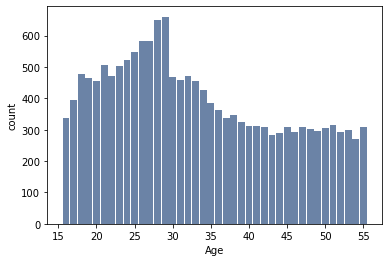

In [7]:
#Histogram for Age
age = df["Age"]
hist = thinkstats2.Hist(age)
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Age', ylabel='count')

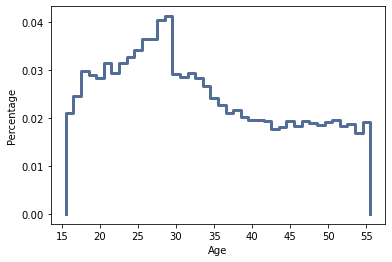

<Figure size 576x432 with 0 Axes>

In [8]:
#Pmf for age
agepmf = thinkstats2.Pmf(age)
thinkplot.PrePlot()
thinkplot.Pmf(agepmf)
thinkplot.Show(xlabel="Age", ylabel="Percentage")

#### What fraction of the people in the data are 51? What fraction are older than 51?

In [9]:
older = df[age > 51]
fifty_one = df [age == 51]
print("People older than 51 =", older["Age"].count())
print("People are 51 =", fifty_one["Age"].count())
print("the total people in the sample", age.count())
print("The fraction of the people in the data are 51 will be", fifty_one["Age"].count(),"/", age.count())
print("The fraction of the people in the data are older than 51 will be", older["Age"].count(),"/", age.count())

People older than 51 = 1171
People are 51 = 314
the total people in the sample 15992
The fraction of the people in the data are 51 will be 314 / 15992
The fraction of the people in the data are older than 51 will be 1171 / 15992


##### What is the median age?

In [10]:
print("Age Median:", np.median(age))

Age Median: 31.0


##### Does the distribution of the sample data seem to mirror the working age population?

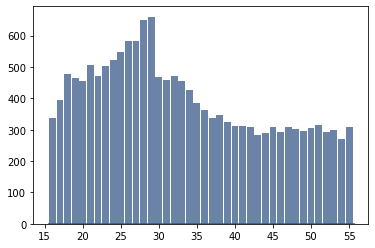

In [11]:
thinkplot.Hist(hist)
thinkplot.Pmf(agepmf, color="red")


### Part 2 - Demographics

<ul>
<li>Consider some of the demographic features: 
    <ul>
    <li>Education
    <li>Race
    <li>Hisp
    <li>MaritalStatus
    <li>Nodeg. 
    </ul>
</ul>
<ol>
<li>This data came from the United States, does it appear to be a representative sample of the US population?
<li>Demonstrate this in some way in your code. 
</ol>

##### Exploring the data...

In [12]:
#Education Info
df["Eduacation"].value_counts()

HighSchool            6252
LessThanHighSchool    4731
Intermediate          2708
graduate              1367
PostGraduate           934
Name: Eduacation, dtype: int64

In [13]:
#Race info
df["Race"].value_counts()

NotBlack    14816
black        1176
Name: Race, dtype: int64

In [14]:
#Hisp
df["Hisp"].value_counts()

NotHispanic    14840
hispanic        1152
Name: Hisp, dtype: int64

In [15]:
df["MaritalStatus"].value_counts()

Married       11382
NotMarried     4610
Name: MaritalStatus, dtype: int64

In [16]:
df["Nodeg"].value_counts()

0    11261
1     4731
Name: Nodeg, dtype: int64

##### Demographic Conclusion


<li>A sample is representative if every member of the population has the same chance of being in the sample.
In this case, There are 1152 of Hispanic people and 1176 of the black people participate in the sample, which is 1152/15992(7.2%) and 1176/15992(7.3%).
Base on the limit infomation we have now, it seems to be a representative sample of the US population.

### Part 3 - Earnings

<ol>
<li>Make and plot a graph or graph of your choosing of the 3 earnings values, in order to answer the below question. Identify how the graph gave you your answer.
    <ul>
    <li>What is one conclusion could you draw from visualizing of the earnings in the different year? Please express it in plain language/non-statistics terms/as though you were explaining to one of your friends what happened to earnings between 1974 and 1978?
    </ul>
<li>Which has the greatest effect size on 1978 earnings: Race, Hispanic, MaritalStatus, or Nodeg? 
    <ul>
    <li>What could you investigate further in an attempt to explain this?
    </ul>
<li>Plot a histogram and PMF, and compute useful descriptive statistics (think: average...) for the 1978 earnings value. Use the "Cohorts" code from the quiz to break the data into cohorts, plotting each group (either on one chart, or separately, whichever makes the most sense for examining the data - state specifically why you chose 1 vs many charts.
    <ul>
    <li>What is the difference in median income between the groups?
    <li>Theorize a reason for the difference between the groups that could be explained with more data. Briefly describe the data you'd need. This does not need to be something you have data for, or know how to solve right now - just one well founded hypothesis on what might explain the difference.
    </ul>
<li>Are there outliers in the 1978 earnings data? Demonstrate this in some way with your code. 
    <ul>
    <li>What can you infer from the presence of outliers that may impact analysis of this data.
    </ul>
</ol>

##### Plot Earnings Data

In [17]:
df.columns

Index(['Age', 'Eduacation', 'Race', 'Hisp', 'MaritalStatus', 'Nodeg',
       'Earnings_1974', 'Earnings_1975', 'Earnings_1978'],
      dtype='object')

In [18]:
df["Earnings_1974"].sample(5)

4285     25862.32
11736    18995.09
14396    25862.32
11092    14765.03
4511     24696.56
Name: Earnings_1974, dtype: float64

In [19]:
df["Earnings_1974"].value_counts()

25862.3200    3052
0.0000        1913
25860.3600      24
3136.7860       17
20376.3700      12
              ... 
19859.1300       1
687.7026         1
6197.1610        1
2306.0570        1
1733.9510        1
Name: Earnings_1974, Length: 7333, dtype: int64

In [33]:
print(df["Earnings_1974"].describe())
print(df["Earnings_1975"].describe())
print(df["Earnings_1978"].describe())

count    15992.000000
mean     14016.800304
std       9569.795893
min          0.000000
25%       4403.452250
50%      15123.580000
75%      23584.180000
max      25862.320000
Name: Earnings_1974, dtype: float64
count    15992.000000
mean     13650.803376
std       9270.403225
min          0.000000
25%       4398.823000
50%      14557.110000
75%      22923.737500
max      25243.550000
Name: Earnings_1975, dtype: float64
count    15992.000000
mean     14846.659673
std       9647.391524
min          0.000000
25%       5669.298000
50%      16421.975000
75%      25564.670000
max      25564.670000
Name: Earnings_1978, dtype: float64


In [29]:
hist_1974 = thinkstats2.Hist(round(df["Earnings_1974"],-3), label='1974')
hist_1975 = thinkstats2.Hist(round(df["Earnings_1975"],-3), label='1975')
hist_1978 = thinkstats2.Hist(round(df["Earnings_1978"],-3), label='1978')


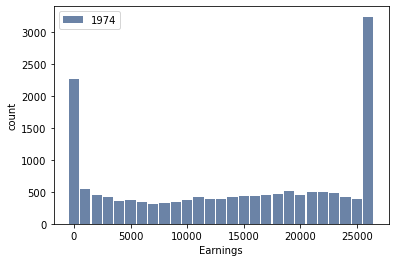

In [30]:
#Hisogram for Earning_1974
thinkplot.Hist(hist_1974)
thinkplot.Config(xlabel='Earnings', ylabel='count')

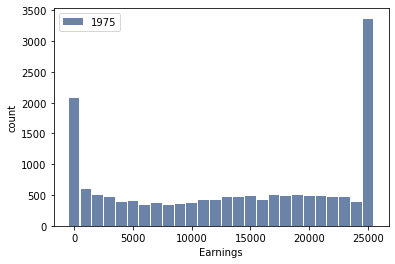

In [31]:
#Hisogram for Earning_1975
thinkplot.Hist(hist_1975)
thinkplot.Config(xlabel='Earnings', ylabel='count')

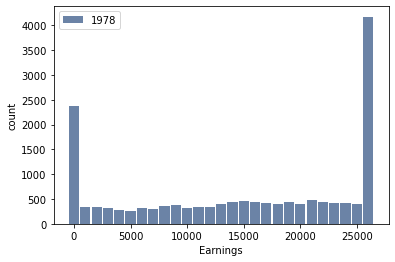

In [32]:
#Hisogram for Earning_1978
thinkplot.Hist(hist_1978)
thinkplot.Config(xlabel='Earnings', ylabel='count')

#1
In conclusion, between earnings 1974 to 1978 they have same pattern in hisograms, which there seems to have large number of people earning near the 0 income and the top end around $25K. Otherwise the distributions in the middle area are pretty similar. 

In [34]:
#Which has the greatest effect size on 1978 earnings: Race, Hispanic, MaritalStatus, or Nodeg? 
#What could you investigate further in an attempt to explain this?
def CohenEffectSize(group1, group2):
    """Computes Cohen's effect size for two groups.
    
    group1: Series or DataFrame
    group2: Series or DataFrame
    
    returns: float if the arguments are Series;
             Series if the arguments are DataFrames
    """
    diff = group1.mean() - group2.mean()

    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d

In [58]:
#Effect Size for Race
black = df[df["Race"] == 'black']
noblack = df[df["Race"] == 'NotBlack']
CohenEffectSize(black["Earnings_1978"], noblack["Earnings_1978"])

-0.31883255859070525

In [60]:
#Effect Size for Hispanic
hispanic = df[df["Hisp"] == 'hispanic']
nohiso = df[df["Hisp"] == 'NotHispanic']
CohenEffectSize(hispanic["Earnings_1978"], nohiso["Earnings_1978"])

-0.16210284395555566

In [62]:
#Effect Size for MaritalStatus
married = df[df["MaritalStatus"] == 'Married']
nomarried = df[df["MaritalStatus"] == 'NotMarried']
CohenEffectSize(married["Earnings_1978"], nomarried["Earnings_1978"])

0.5737396692403472

In [65]:
#Effect Size for Nodeg
no = df[df["Nodeg"] == 0]
yes = df[df["Nodeg"] == 1]
CohenEffectSize(no["Earnings_1978"], yes["Earnings_1978"])

0.3367928897615812

### The Marital Status has the greatest effect size 0.574, which has practical significance. 

##### What to Investigate Further


##### Histogram and PMF

In [21]:
#Create a hist, pmf, and stats for 1987 Earnings
#Note: if you don't round or otherwise create bins, the thinkstats plots for this will be weird
#That's because there are very few values that are the same, e.g. $14762.34, $15672.86, etc... 
#Every cent is a different value. 
#Seaborn plots will probably look better by default. 

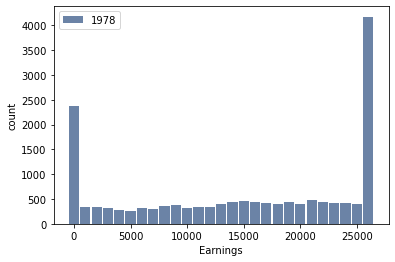

In [66]:
#Hisogram for Earning_1978
thinkplot.Hist(hist_1978)
thinkplot.Config(xlabel='Earnings', ylabel='count')

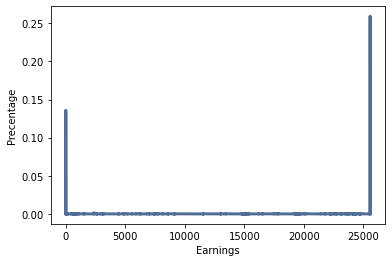

<Figure size 576x432 with 0 Axes>

In [67]:
#PMF for Earning_1978

pmf1978 = thinkstats2.Pmf(df["Earnings_1978"])
thinkplot.PrePlot()
thinkplot.Pmf(pmf1978)
thinkplot.Show(xlabel='Earnings', ylabel='Precentage')

##### Differences in Median Income, and Theory on Why


##### Outliers

##### Outlier Conclusions
